In [12]:
from dqnotebook import QuadraticDrawer

In [13]:
%matplotlib notebook

In [14]:
from cmath import rect, pi, sqrt

In [15]:
from obj import QuadraticDifferential
import matplotlib as mpl
#mpl.use("pgf")
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


In [ ]:
fig = plt.figure()
quad= QuadraticDifferential()
quad_drawer = QuadraticDrawer(quad, fig)

In [ ]:
quad.phase=rect(1,0)
quad_drawer.draw_trajectories()

In [ ]:
fig2=plt.figure()
quad_drawer2=QuadraticDrawer(quad,fig2)

In [ ]:
quad.phase=rect(1,pi)
quad_drawer2.draw_trajectories()

In [ ]:
quad.add_plotpoint(complex(1,1))
quad.add_plotpoint(complex(1,-1))
quad.add_plotpoint(complex(-1,1))
quad.add_plotpoint(complex(-1,-1))
quad.add_plotpoint(complex(-1.5,0))
quad.add_plotpoint(complex(1.5,0))
quad.add_plotpoint(complex(0,0))
quad.add_plotpoint(complex(0.3,0.1))
quad.add_plotpoint(complex(0.4,0.1))
quad.add_plotpoint(complex(0.5,0.1))
quad.add_plotpoint(complex(0.6,0.1))
quad.add_plotpoint(complex(0.7,0.1))

In [ ]:
for x in range(10):
    quad.add_plotpoint(complex(0.1,-0.1*x))

In [ ]:
quad.add_zero(complex(1,0.0001))
quad.add_zero(complex(-1,0))

In [ ]:
quad.add_dblpole(complex(0,1))

In [ ]:
quad.add_dblpole(complex(0,-1))

In [ ]:
quad_drawer.draw_trajectories()

In [ ]:
print quad.zeros
print quad.dblpoles

In [ ]:
fig3=plt.figure()
quad3=QuadraticDifferential()
quad_drawer3=QuadraticDrawer(quad3,fig3)
quad_drawer3.draw_trajectories()

In [ ]:
quad3.zeros=[complex(-1,-1),complex(.9,-1),complex(.8,.8),complex(-.7,.85)]

In [ ]:
quad3.dblpoles=[complex(.1,.1),complex(-.5,-1.1),complex(0.1,1.1),complex(-1.2,1.3)]

In [ ]:
quad3.plotpoints = []

In [ ]:
for x in range(30):
    quad3.add_plotpoint(complex(-2+.2*x,.3))

In [ ]:
for x in range(30):
    quad3.add_plotpoint(complex(-2+.2*x,-.6))

In [ ]:
for x in range(30):
    quad3.add_plotpoint(complex(-2+.2*x,-2))

In [ ]:
quad_drawer3.draw_trajectories()

In [ ]:
tr= quad3.trajectories[((0.6000000000000001-0.6j), (1+0j))]

In [ ]:
tr.coordinates.tolist().index([tr.plotpoint.real,tr.plotpoint.imag])

In [16]:
def hacer_reticula(quad, punto, paso, longitud):
    t1 = quad.compute_trajectory(punto)
    quad.phase = quad.phase*complex(-1,0)
    t2 = quad.compute_trajectory(punto)
    coord1=t1.coordinates.tolist()
    coord2=t2.coordinates.tolist()
    plots = []
    plots_ort = []
    recorrido = 0
    num_paso = 1
    start1 = coord1.index([t1.plotpoint.real, t1.plotpoint.imag])
    start2 = coord2.index([t2.plotpoint.real, t2.plotpoint.imag])
    while recorrido < longitud:
        paso_inicio = complex(coord1[start1][0],coord1[start1][1])
        paso_fin = complex(coord1[start1+1][0],coord1[start1+1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start1 += 1
        if recorrido >= num_paso*paso:
            plots_ort.append(paso_fin)
            num_paso += 1
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord2[start2][0],coord2[start2][1])
        paso_fin = complex(coord2[start2+1][0],coord2[start2+1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start2 += 1
        if recorrido >= num_paso*paso:
            plots.append(paso_fin)
            num_paso += 1
    start1 = coord1.index([t1.plotpoint.real, t1.plotpoint.imag])
    start2 = coord2.index([t2.plotpoint.real, t2.plotpoint.imag])
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord1[start1][0],coord1[start1][1])
        paso_fin = complex(coord1[start1-1][0],coord1[start1-1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start1 -= 1
        if recorrido >= num_paso*paso:
            plots_ort.append(paso_fin)
            num_paso += 1
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord2[start2][0],coord2[start2][1])
        paso_fin = complex(coord2[start2-1][0],coord2[start2-1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start2 -= 1
        if recorrido >= num_paso*paso:
            plots.append(paso_fin)
            num_paso += 1
    quad.plotpoints = quad.plotpoints + plots + plots_ort
        

In [ ]:
fig4=plt.figure()
quad4=QuadraticDifferential()
quad_drawer4=QuadraticDrawer(quad4,fig4)
quad_drawer4_ort=QuadraticDrawer(quad4,fig4)
quad4.zeros=[complex(0.1,2.3), complex(1,-1.2),complex(-2.9,0.3)]
quad4.dblpoles = [complex(2,1.5),complex(-1.8,1.7), complex(-2.5,-1.9)]
quad4.plotpoints = []
quad4.trajectories = {}
hacer_reticula(quad4, complex(-.3,-.35), 0.1, .5)
quad4.phase=complex(1,0)
quad_drawer4.draw_trajectories()
quad4.phase=complex(-1,0)
quad_drawer4_ort.draw_trajectories()

In [ ]:
fig5=plt.figure()
quad5=QuadraticDifferential()
quad_drawer5=QuadraticDrawer(quad5,fig5)
quad_drawer5_ort=QuadraticDrawer(quad5,fig5)
quad5.zeros=[complex(0.1,2.3),complex(0.1,2.3),complex(0.1,2.3) ]
quad5.dblpoles = []
quad5.smplpoles = [complex(0.4,-2)]
quad5.plotpoints = []
quad5.trajectories = {}
hacer_reticula(quad5, complex(-.3,-.35), 0.3, 5)
quad5.phase=complex(1,0)
quad_drawer5.draw_trajectories()
quad5.phase=complex(-1,0)
quad_drawer5_ort.draw_trajectories()

In [ ]:
fig6=plt.figure()
quad6=QuadraticDifferential()
quad_drawer6=QuadraticDrawer(quad6,fig6)
quad_drawer6_ort=QuadraticDrawer(quad6,fig6)
quad6.zeros=[complex(0.1,2.3),complex(-2.1,-2.3),complex(3.1,-2.3) ]
quad6.dblpoles = [complex(0.4,-2)]
quad6.smplpoles = [complex(0.4,-2)]
quad6.plotpoints = []
quad6.trajectories = {}
hacer_reticula(quad6, complex(-.3,-.35), 0.3, 5)
quad6.phase=complex(1,0)
quad_drawer6.draw_trajectories()
quad6.phase=complex(-1,0)
quad_drawer6_ort.draw_trajectories()

In [ ]:
fig7=plt.figure()
quad7=QuadraticDifferential()
quad_drawer7=QuadraticDrawer(quad7,fig7)
quad_drawer7_ort=QuadraticDrawer(quad7,fig7)
quad7.zeros=[complex(0.1,2.3),complex(-2.1,-2.3),complex(3.1,-2.3) ]
quad7.dblpoles = [complex(0.4,-2),complex(0.4,-2)]
quad7.smplpoles = [complex(0.4,-2)]
quad7.plotpoints = []
quad7.trajectories = {}
hacer_reticula(quad7, complex(-.3,-.35), 0.3, 5)
quad7.phase=complex(1,0)
quad_drawer7.draw_trajectories()
quad7.phase=complex(-1,0)
quad_drawer7_ort.draw_trajectories()

In [ ]:
fig8=plt.figure()
quad8=QuadraticDifferential()
quad_drawer8=QuadraticDrawer(quad8,fig8)
quad_drawer8_ort=QuadraticDrawer(quad8,fig8)
quad8.zeros=[complex(0.1,2.3),complex(-2.1,-2.3),complex(3.1,-2.3) ]
quad8.dblpoles = [complex(0.4,-2),complex(0.4,-2)]
quad8.smplpoles = [complex(0.4,-2)]
quad8.plotpoints = []
quad8.trajectories = {}
hacer_reticula(quad8, complex(-2,1), 0.1, 4)
quad8.phase=complex(1,0)
quad_drawer8.draw_trajectories()
quad8.phase=complex(-1,0)
quad_drawer8_ort.draw_trajectories()

<IPython.core.display.Javascript object>


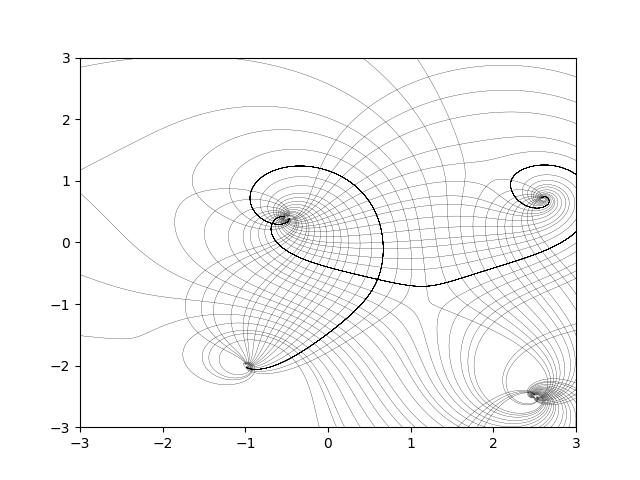

..........................................................
........................................................


In [17]:
fig9=plt.figure()
quad9=QuadraticDifferential()
quad_drawer9=QuadraticDrawer(quad9,fig9)
quad_drawer9_ort=QuadraticDrawer(quad9,fig9)
quad9.zeros=[complex(1.2,-1),complex(2,1.1),complex(-2,0.9), complex(-2.3,-1.7) ]
quad9.dblpoles = [complex(2.5,-2.5), complex(2.6, 0.7), complex(-0.5, 0.4), complex(-1,-2)]
quad9.plotpoints = []
quad9.trajectories = {}
hacer_reticula(quad9, complex(.6,-.6), 0.03, 0.42)
quad9.phase=complex(1,0)
quad_drawer9.draw_trajectories()
quad9.phase=complex(-1,0)
quad_drawer9_ort.draw_trajectories()

In [ ]:
hacer_reticula(quad9, complex(.6,-.6), 0.03, 0.48)
quad9.phase=complex(1,0)
quad_drawer9.draw_trajectories()
quad9.phase=complex(-1,0)
quad_drawer9_ort.draw_trajectories()

<IPython.core.display.Javascript object>


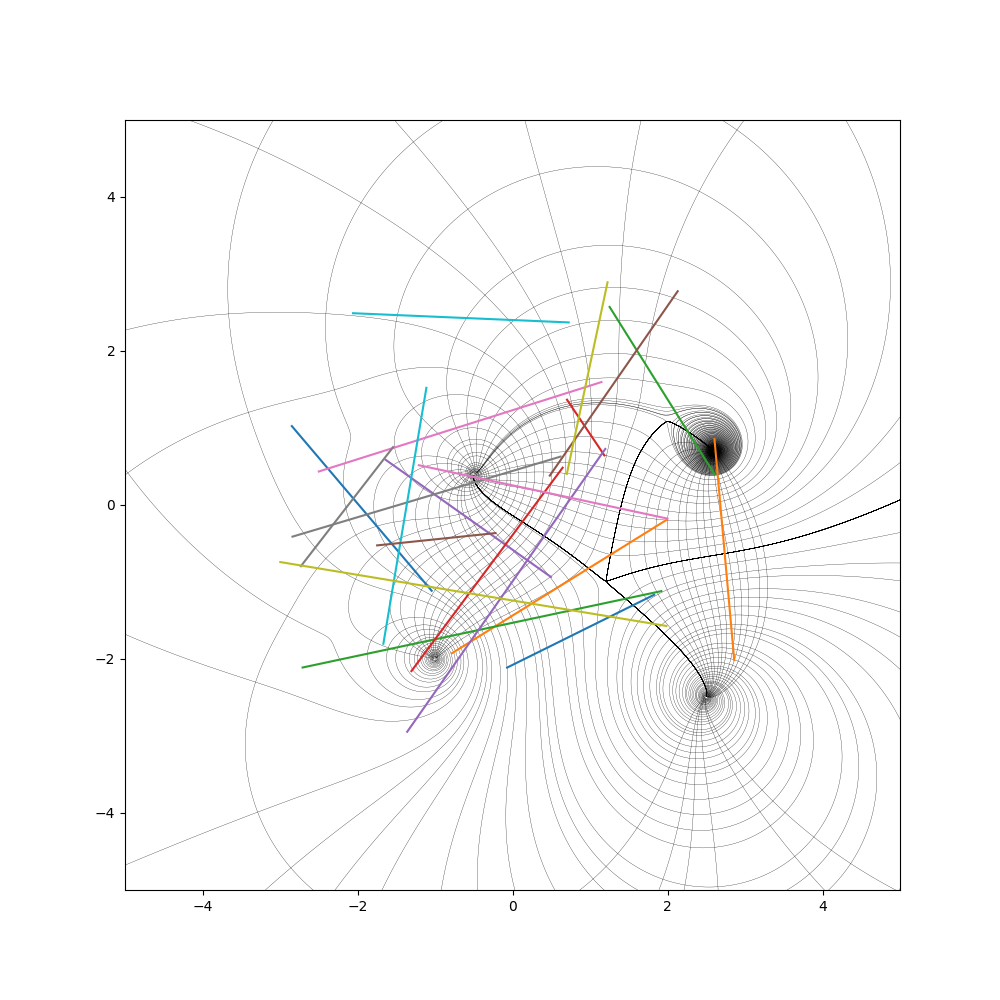

..........................................................
........................................................


In [33]:
fig9=plt.figure()
quad9=QuadraticDifferential()
quad9.phase=nueva_fase
quad_drawer9=QuadraticDrawer(quad9,fig9)
quad_drawer9_ort=QuadraticDrawer(quad9,fig9)
quad9.zeros=[complex(1.2,-1),complex(2,1.1),complex(-2,0.9), complex(-2.3,-1.7) ]
quad9.dblpoles = [complex(2.5,-2.5), complex(2.6, 0.7), complex(-0.5, 0.4), complex(-1,-2)]
quad9.plotpoints = []
quad9.trajectories = {}
hacer_reticula(quad9, complex(1.21,-.99), 0.03, 0.42)
quad9.phase=quad9.phase*complex(-1,0)
quad_drawer9.draw_trajectories()
quad9.phase=quad9.phase*complex(-1,0)
quad_drawer9_ort.draw_trajectories()

In [34]:
limite= 5.0
quad_drawer9.ax.set_ylim(-1*limite,limite)
quad_drawer9.ax.set_xlim(-1*limite,limite)
fig9.set_size_inches(10,10)

In [18]:
from obj import Monodromy

In [22]:
def integrar(x,y,quad, pasos):
    paso = (y-x)/pasos
    medio_paso = paso/2
    mon=Monodromy(quad(x))
    integral = 0
    for i in range(pasos):
        integral += mon.dist(quad(x+medio_paso))*paso*sqrt(abs(quad.QD(x+medio_paso)))
        #integral += paso*(sqrt(abs(quad.QD(x)))*mon.dist(quad(x))   +  sqrt(abs(quad.QD(x+paso)))*mon.dist(quad(x+paso))     )/2
        x+=paso
        mon(quad(x))
    return integral

In [ ]:
quad9.phase= complex(1,0)

In [20]:
nueva_fase = integrar(complex(1.201,-1),complex(2,1.101),quad9,10000)
nueva_fase= nueva_fase/abs(nueva_fase)

In [21]:
nueva_fase=nueva_fase**-2

In [29]:
from numpy import arange

In [ ]:
fig_error2=plt.figure()

In [27]:
def error(inicio,fin,quad):
    x=arange(20,100)
    x = [500*i for i in x]
    y = [integrar(inicio,fin,quad,i) for i in x]
    x= arange(1,79)
    y2 = [abs(y[i]-y[i-1]) for i in x]
    return [x,y2]

In [ ]:
plt.figure(7)


In [31]:
from numpy import random
Parejas = []
for x, y, z, w in 6*random.random((20,4))-3.0:
    Parejas.append([complex(x,y),complex(z,w)])

In [35]:
for x, y in Parejas:
    plt.plot([x.real,y.real],[x.imag,y.imag])

In [ ]:
figsss = plt.figure(9)
for x,y in Parejas:
    er = error(x,y,quad9)
    xes=er[0]
    yes=er[1]
    plt.plot(xes,yes)
plt.yscale('log')

In [ ]:
fig_errrrr = plt.figure(10)
for x,y in Parejas:
    er = error(x,y,quad9)
    xes=er[0]
    yes=er[1]
    plt.plot(xes,yes)
plt.yscale('log')

In [36]:
fig_errrrrr = plt.figure(11)
for x,y in Parejas:
    er = error(x,y,quad9)
    print "El error en los puntos "+str(x)+" , "+str(y)+" es "+str(er[1][-1])
    xes=er[0]
    yes=er[1]
    plt.plot(xes,yes)
plt.yscale('log')

El error en los puntos (-1.04277506907-1.11409609008j) , (-2.84699863118+1.02449248033j) es 6.13416854824e-13
El error en los puntos (2.86091531101-2.01256447083j) , (2.60601849798+0.855756644618j) es 1.93302682582e-11
El error en los puntos (1.25311111141+2.57219272554j) , (2.60847649062+0.39618298687j) es 3.06245588037e-12
El error en los puntos (0.703583466869+1.36711684762j) , (1.18557816925+0.644339932188j) es 9.98734936718e-14
El error en los puntos (-1.63680101528+0.586940963785j) , (0.496109987876-0.934851062345j) es 2.8262489088e-13
El error en los puntos (0.481425759812+0.381759232439j) , (2.13142181762+2.77592856482j) es 7.81134147116e-13
El error en los puntos (-2.4992339065+0.435057025901j) , (1.14759535745+1.59649103941j) es 5.86065403686e-14
El error en los puntos (-2.83866670149-0.410843924264j) , (0.62010084993+0.628506295277j) es 2.63806419081e-13
El error en los puntos (1.22631849016+2.89257687519j) , (0.70093999556+0.402936679859j) es 1.60101724425e-13
El error en l

<IPython.core.display.Javascript object>


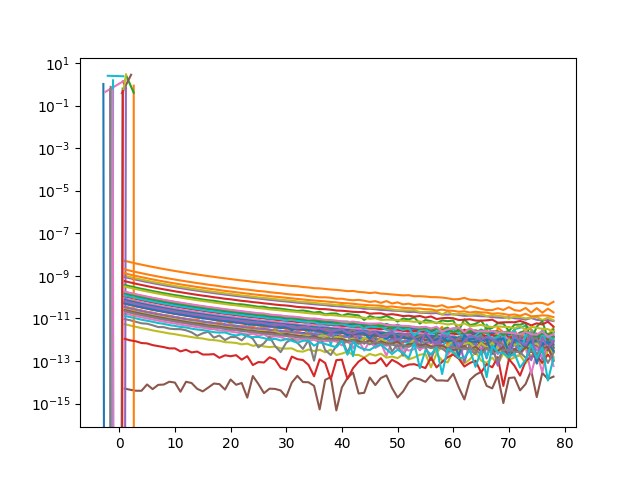

In [37]:
fig_errrrrr

In [ ]:
fig_err_trapez = plt.figure(12)
for x,y in Parejas:
    er = error(x,y,quad9)
    print "El error en los puntos "+str(x)+" , "+str(y)+" es "+str(er[1][-1])
    xes=er[0]
    yes=er[1]
    plt.plot(xes,yes)
plt.yscale('log')
fig_err_trapez